<a href="https://colab.research.google.com/github/RobSmyth23/DataAnalytics/blob/main/DataAnalyticsCA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Analytics CA 2
### T00145976
### Robert Smyth

#### Aim: I wish to analyse a dataset using the CRISP-DM methodology
#### Dataset is a list of Steam Games withe their title, publisher, price and player count, along with other columns.

### Goal: To accuratly predict a steam games price based on the given information in the dataset using the CRISP-DM methodology and regression.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression

The following will follow CRISP-DM to predict Steam Game Prices by using Linear Regression. I will be using the dataset games.csv in order to do this.
Columns in the dataset such as DLC count, Price, Languages and Release Year will be used to assist this goal.


# 1. Business Understanding
#
#
+ Game developers and game companies waould want to estimate appropriate pricing for their soon to be released game(s) using available information.

+ Success Criteria: Creating a regression model that will accuratly be  able to predict a games price using error statistics and visual comparisons of actual and predicted prices.

In [33]:
df = pd.read_csv('games.csv', engine='python', encoding='utf-8', on_bad_lines='skip')
df.head()
df.info()
df.describe()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71716 entries, 0 to 71715
Data columns (total 39 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   AppID                       71716 non-null  int64  
 1   Name                        71715 non-null  object 
 2   Release date                71716 non-null  object 
 3   Estimated owners            71716 non-null  object 
 4   Peak CCU                    71716 non-null  int64  
 5   Required age                71716 non-null  int64  
 6   Price                       71716 non-null  float64
 7   DLC count                   71716 non-null  int64  
 8   About the game              69280 non-null  object 
 9   Supported languages         71716 non-null  object 
 10  Full audio languages        71716 non-null  object 
 11  Reviews                     9167 non-null   object 
 12  Header image                71716 non-null  object 
 13  Website                     350

,0
AppID,0
Name,1
Release date,0
Estimated owners,0
Peak CCU,0
Required age,0
Price,0
DLC count,0
About the game,2436
Supported languages,0


+ This loads the games.csv file into a Dataframe I called 'df'.
+ I used 'engine='python'' and 'onbadlines='skip'' because the dataset contains messy field that have repeatedly broken my model and csv loading. This makes sure the dataset loads without errors.
+ I used df.head to show the first few columns so I can see what the data looks like
+ I used df.show to get a summary of the dataset e.g. number of rows and columns, the column names, data types and how many null/missing values there are.
+ I used df.isnull.sum to count how many missing values there actually are in order to see what needs to be cleaned before modelling.

# 2. Data Understanding

+ This dataset contains over 71 thousand games along with 39 pieces of information i.e. columns about a certain game. These include numeric, boolean and text fields.

+ The key columns for my analysis are:
#
-- Price as a float
#
-- Estimate Owners as an object
#
-- Peak CCU (concurrent users)
#
-- Required Age
#
-- Amount of DLC's (downloadable content, post purchase of initial game)
#
-- Release Date
#
-- Supported Languages

In [34]:
df.head()

,AppID,Name,Release date,Estimated owners,Peak CCU,Required age,Price,DLC count,About the game,Supported languages,...,Average playtime two weeks,Median playtime forever,Median playtime two weeks,Developers,Publishers,Categories,Genres,Tags,Screenshots,Movies
0,20200,Galactic Bowling,"Oct 21, 2008",0 - 20000,0,0,19.99,0,Galactic Bowling is an exaggerated and stylize...,['English'],...,0,0,0,Perpetual FX Creative,Perpetual FX Creative,"Single-player,Multi-player,Steam Achievements,...","Casual,Indie,Sports","Indie,Casual,Sports,Bowling",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
1,655370,Train Bandit,"Oct 12, 2017",0 - 20000,0,0,0.99,0,THE LAW!! Looks to be a showdown atop a train....,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Rusty Moyher,Wild Rooster,"Single-player,Steam Achievements,Full controll...","Action,Indie","Indie,Action,Pixel Graphics,2D,Retro,Arcade,Sc...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
2,1732930,Jolt Project,"Nov 17, 2021",0 - 20000,0,0,4.99,0,Jolt Project: The army now has a new robotics ...,"['English', 'Portuguese - Brazil']",...,0,0,0,Campião Games,Campião Games,Single-player,"Action,Adventure,Indie,Strategy",NaN,https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
3,1355720,Henosis™,"Jul 23, 2020",0 - 20000,0,0,5.99,0,HENOSIS™ is a mysterious 2D Platform Puzzler w...,"['English', 'French', 'Italian', 'German', 'Sp...",...,0,0,0,Odd Critter Games,Odd Critter Games,"Single-player,Full controller support","Adventure,Casual,Indie","2D Platformer,Atmospheric,Surreal,Mystery,Puzz...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...
4,1139950,Two Weeks in Painland,"Feb 3, 2020",0 - 20000,0,0,0.00,0,ABOUT THE GAME Play as a hacker who has arrang...,"['English', 'Spanish - Spain']",...,0,0,0,Unusual Games,Unusual Games,"Single-player,Steam Achievements","Adventure,Indie","Indie,Adventure,Nudity,Violent,Sexual Content,...",https://cdn.akamai.steamstatic.com/steam/apps/...,http://cdn.akamai.steamstatic.com/steam/apps/2...


+ The first couple rows in the dataset shows numeric columns such as Price and CCU are already clean. However, some of the columns such as Publishers and About have spaces and multiple lines and this has caused issues when loading the dataset.

### Exploratory Analysis


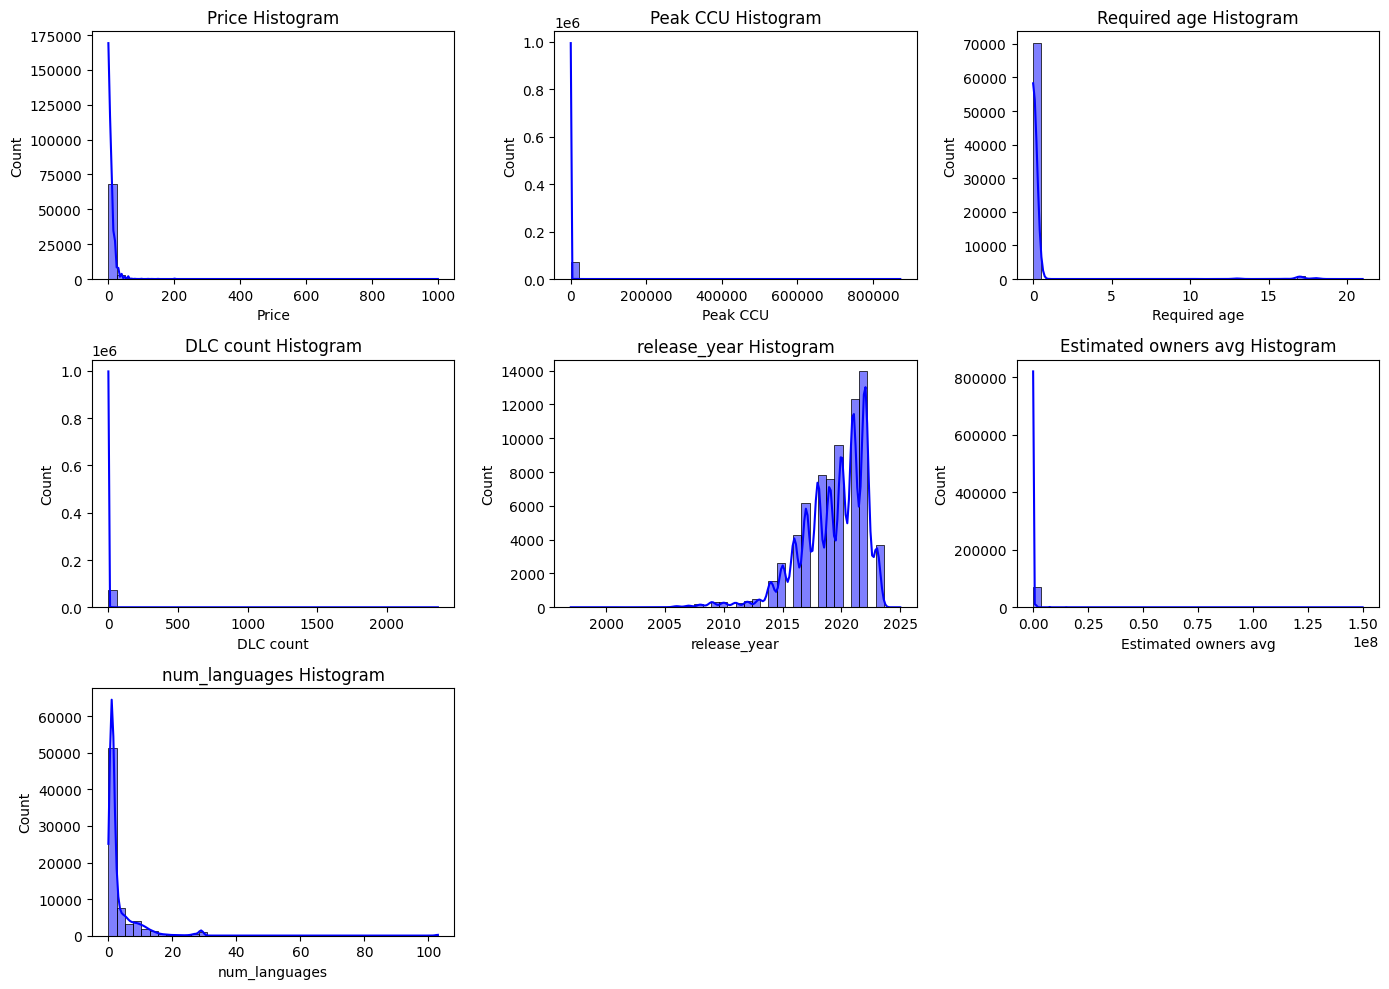

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_columns = ['Price', 'Peak CCU', 'Required age', 'DLC count', 'release_year', 'Estimated owners avg', 'num_languages']
plt.figure(figsize=(14,10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3,3,i)
    sns.histplot(df_model[col], bins=40, kde=True, color='blue')
    plt.title(f'{col} Histogram')
plt.tight_layout()
plt.show()

### Observations from above Histograms:

+ The Price is skewed, most games are under Fifty Dollars
+ The Peak CCU is heavily skewed, most of the data is concentrated in one area, most games have a low concurrent user count
+ Most games in the dataset are cheap, so there are few expensive games to pull the diagram line to the right. Thsi will possibly affect the regression as linear regression assumes normal distribution and this will result in model inaccuracy
+ Release Year shows most games were released in the last 15 years
+ Also Number of Languages is concentrated at a low value, showing most games do not support a lot of languages

## Transformation

- I will change release date to release year.
- I will change estimated owners from a range to an average figure.
- I will also count the number of supported languages as a figure instead of text fields.
- I will also now drop all the text columns I wont be using e.g. (AppID, Name, About the game, Reviews)

In [40]:
df['release_year'] = pd.to_datetime(df['Release date'], errors='coerce').dt.year

def owners_to_avg(val):
    try:
        low, high = val.split(' - ')
        return (int(low) + int(high)) / 2
    except:
        return np.nan

df['Estimated owners avg'] = df['Estimated owners'].apply(owners_to_avg)
def count_languages(s):
    if pd.isnull(s) or s == '[]':
        return 0
    s = s.strip('[]')
    items = s.split(',')
    return len(items)

df['num_languages'] = df['Supported languages'].apply(count_languages)

cols_to_drop = ['AppID', 'Name', 'Release date', 'Estimated owners', 'About the game',
    'Reviews', 'Website', 'Support url', 'Support email', 'Header image',
    'Full audio languages', 'Metacritic url', 'Score rank', 'Notes',
    'Developers', 'Publishers', 'Categories', 'Genres', 'Tags',
    'Screenshots', 'Movies']

df_model = df.drop(columns=cols_to_drop)
df_model.head()

,Peak CCU,Required age,Price,DLC count,Supported languages,Windows,Mac,Linux,Metacritic score,User score,...,Negative,Achievements,Recommendations,Average playtime forever,Average playtime two weeks,Median playtime forever,Median playtime two weeks,release_year,Estimated owners avg,num_languages
0,0,0,19.99,0,['English'],True,False,False,0,0,...,11,30,0,0,0,0,0,2008.0,10000.0,1
1,0,0,0.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",True,True,False,0,0,...,5,12,0,0,0,0,0,2017.0,10000.0,10
2,0,0,4.99,0,"['English', 'Portuguese - Brazil']",True,False,False,0,0,...,0,0,0,0,0,0,0,2021.0,10000.0,2
3,0,0,5.99,0,"['English', 'French', 'Italian', 'German', 'Sp...",True,True,True,0,0,...,0,0,0,0,0,0,0,2020.0,10000.0,11
4,0,0,0.00,0,"['English', 'Spanish - Spain']",True,True,False,0,0,...,8,17,0,0,0,0,0,2020.0,10000.0,2


+ Here I converted release date to a year value so it becomes a single numeric value. The same for estimated owners, instead of a range e.g.  2000-5000, I split the range and calculated the average to create a single numeric value. Supported languages is a long textfield, so I instead converted this to a number by counting how many languages a game supports.
+ Unnecessary columns were also dropped e.g. game ID, URLS and Genres becasue they are text heavy and not useful for this prediction model. The dataset should only contain numeric values for the regression model to be succesfull.

### Results of Transforming

+ I extracted 'release_year' from 'Release date' in order to get a representaion of the games age.

+ I converted 'Estiated Owners' ranges to numeric values on average(`Estimated owners avg`).

+ I calculated the number of supported languages as 'num_languages'. Works better for me than blocks of text in this case.

+ I dropped irrelevant text field columns which wont be needed for predicting the price.

+ The resulting dataset now contains all the columns needed to create the regression model.

# 3. Data Preparation

- Here I will handle all the missing values within the transformed columns e.g. Release Year and Estimated Avg Owners

- I will use X as features and Y as the target.

- I will also seperate the dataset into training and test sets.

In [41]:
imputer = SimpleImputer(strategy='median')
df_model[['release_year', 'Estimated owners avg']] = imputer.fit_transform(
    df_model[['release_year', 'Estimated owners avg']]
)

X = df_model.drop('Price', axis=1)
y = df_model['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((57372, 20), (14344, 20))

+ Some games were missing values such as release year and estimated owners. I used a median imputer to fill these gaps so the model can train on the dataset without any errors.

+ I was constantly getting errors and couldnt figure out how to fix this, but a median is a good choice here as it is not affected by any other information. I split the dataset into X and Y and trained it on a 80/20 split.

### Outcome

+ The results here ((57372, 20), (14344, 20)) show that over 57 thousand rows of data were used to train the model and over 14 thousand were kept for testing. Each row had 20 features used. This signifies a 80/20 split.

+ Missing values in release year and estimated avg owners were replaced with the median value.

+ The features, X, include Peak concurrent users, required age, DLCs, release year, estimated avg owners and number of languages.

+ The target variable Y is the Price.

+ The dataset was split into training and test sets in order to evaluate the regressions performance.

+Note: Some values are still objects/strings. Therefore as linear regression only accepts numeric input i need to  convert these string/object types to be numberic e.g. counts or drop them if not possible.

In [42]:
X_train.dtypes
X_train['num_languages'] = pd.to_numeric(X_train['num_languages'], errors='coerce').fillna(0)
X_test['num_languages'] = pd.to_numeric(X_test['num_languages'], errors='coerce').fillna(0)

+ Here I checked the datatypes in X_Train to ensure all the features being used are in a numeric format.

In [44]:
def count_languages(s):
    if pd.isnull(s) or s == '[]':
        return 0
    s = s.strip('[]')
    items = s.split(',')
    return len(items)

X_train['num_languages'] = X_train['Supported languages'].apply(count_languages)
X_test['num_languages'] = X_test['Supported languages'].apply(count_languages)

+ Here I converted number of languages to a numeric value and if they cannot become numeric, they become null or '0'. I also run the count languages function to ensure the language count is accurate. This makes the long text list on a game numeric e.g. [english],[spanish] into 2.

In [45]:
columns_to_drop = ['About the game', 'Reviews', 'Notes', 'Website', 'Support url', 'Support email',
                   'Metacritic url', 'Developers', 'Publishers', 'Categories', 'Genres', 'Tags',
                   'Screenshots', 'Movies', 'Header image']

X_train = X_train.drop(columns=columns_to_drop, errors='ignore')
X_test = X_test.drop(columns=columns_to_drop, errors='ignore')

+ Here I remove columns such as descriptions and tags and images etc as they are too large, only text and not numeric. This hopefully keeps the dataset clean and numeric.

In [46]:
X_train.dtypes

,0
Peak CCU,int64
Required age,int64
DLC count,int64
Supported languages,object
Windows,bool
Mac,bool
Linux,bool
Metacritic score,int64
User score,int64
Positive,int64


# 4. Modelling

- I will now use Scikit-Learn for linear regression and train the model on the training set.

- I will also make predictions beased on the test set.

In [49]:
X_train.select_dtypes(include=['object']).columns

Index(['Supported languages'], dtype='object')

In [50]:
print(X_train.dtypes)

Peak CCU                        int64
Required age                    int64
DLC count                       int64
Supported languages            object
Windows                          bool
Mac                              bool
Linux                            bool
Metacritic score                int64
User score                      int64
Positive                        int64
Negative                        int64
Achievements                    int64
Recommendations                 int64
Average playtime forever        int64
Average playtime two weeks      int64
Median playtime forever         int64
Median playtime two weeks       int64
release_year                  float64
Estimated owners avg          float64
num_languages                   int64
dtype: object


+ This checks the data types in the training set to see if any of the columns are still stored as a text field or text object type. As Linear Regression can only work with numeric values, this will help me to confirm if the dataset is ready for scaling and modelling.

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = X_train.drop(columns=['Supported languages'], errors='ignore')
X_test = X_test.drop(columns=['Supported languages'], errors='ignore')
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

+ Standard Scaler is used here to scale the numeric values so they allhave similar ranges. Soem features like CCU have a large set of values compared to others e.g. Required Age.
+ The scaler learns here how to transformthe test data from the training data.
+ I also dropped the Supported Languages colum becasue it is not numeric and caused me issues in the model.

In [53]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
pd.DataFrame({'Actual': y_test.values[:10], 'Predicted': y_pred[:10]})

,Actual,Predicted
0,9.99,6.070002
1,0.00,5.954119
2,0.00,6.623295
3,29.99,6.698644
4,11.99,6.563342
5,12.99,6.763504
6,11.39,13.216688
7,14.99,12.618939
8,4.01,6.784946
9,1.99,6.234559


from matplotlib import pyplot as plt
_df_5['Actual'].plot(kind='hist', bins=20, title='Actual')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6['Predicted'].plot(kind='hist', bins=20, title='Predicted')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='Actual', y='Predicted', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['Actual'].plot(kind='line', figsize=(8, 4), title='Actual')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['Predicted'].plot(kind='line', figsize=(8, 4), title='Predicted')
plt.gca().spines[['top', 'right']].set_visible(False)

+ Here I created the Linear Regression Model and trained it using the scaled training data. The model will now try to find the best fit in the relationship between the features and the game price.
+ I also used the model to predict game prices on the test data, this data is so far unseen by the model. Ths will help me evaluate how well the model is performing.
+ A table is also created here to compare the real prices with the predicted priced for the first 10 games (0-9).

# 5. Evaluation

-The regression seems to be working for me now, so now I will see how well it is functioning.

In [54]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("Model Evaluation Metrics:")

print("R² Score:", r2)

print("MAE:", mae)

print("RMSE:", rmse)

Model Evaluation Metrics:
R² Score: 0.0520855775282153
MAE: 6.002501935093132
RMSE: 10.208449567631533


+ This is where the tree metrics R2, MAE and RMSE are calculated.
+ R2 tells me how much of the variation in prices the moel can explain.
+ MAE is the average amount the predictions are wrong by
+ The RMSE measures the error, 10 being high, shows the predictions are far from the real pricing.

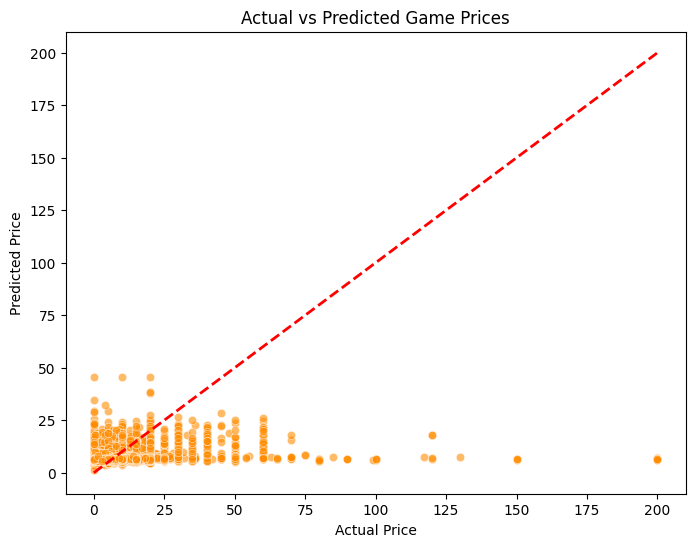

In [55]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.6, color='darkorange')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)

plt.xlabel("Actual Price")

plt.ylabel("Predicted Price")

plt.title("Actual vs Predicted Game Prices")

plt.show()

##Observations:

+ Most plots are clustered near the bottom left, i.e. the lower price range, showing the model as unpredictable for higher priced games.
+ The red line represents a perfect prediction
+ Where as the scatter spread shows prediction errors, consistent with a low R2 as acquired (~0.05).
+ The MAE ~6, and RMSE ~10 show that the model is underestimating and overestimating the prices of games by several dollars, especially low priced games.
+ This confirms that Linear Regression is underfitting for this dataset and will/is struggling to predict high prices accurately.

+ The following will create a small table to compare visually the actual price with the predicted price.

In [57]:
results = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
results.head(30)

,Actual,Predicted
0,9.99,6.070002
1,0.00,5.954119
2,0.00,6.623295
3,29.99,6.698644
4,11.99,6.563342
5,12.99,6.763504
6,11.39,13.216688
7,14.99,12.618939
8,4.01,6.784946
9,1.99,6.234559


Clearly, regression model does not work with estimating game prices.
The R2 score is 0.05. This shows that this model can only explain 5% of the game prices.
#
+ An R2 score of 0.05 shows this model can explain only 5% of the variance in game prices.
+ The MAE is ~6, showing the predicted prices are different by about six dollars
+ The RMSE is ~10.2. This is showing large errors occuring in predictions.

+ As you can see from the above result:
- The model is underestimating higher priced games, and overestimating lower prices games.
+ For example,
- Game 1 is 9.99 but predicted to be a lower 6.07
- Game 2 is free 0.00, but estimated to be higher at 5.95

# 6. Deployment
+ The used features (Peak CCU, Required Age, DLC count, Release Year, Estimated Owners Avg, Num Languages) cannot be used to predict a games price with this model.
+ Therefore, the low R2 (~0.052) suggests that using linear regression cannot be used to accuratly pridct game prices in this dataset.
#
#
+ The MAE is approximately 6.0, showing the model is off by 6 dollars non average.
+ The RMSE is approximately 10.2, showing a large discrepancy in actual to estimate and shows the model cannot estimate the price reliably.
+ According to the predictions above, the model is overestimating low priced games and underestimating higher priced games, e.g. predicting ~5.75 dollars for a 19.99	dollar game.

+ This shows 'underfitting', the linear regression is too simple for this dataset an the price cannot be estimated with used features.
It also shows Linear Regression is too simple for this dataset and pedictions are unreliable.
#
#
+ Therefore, I can say linear regression is not an effective model to predict a games price with this dataset.
#
#
#
#
+ If this model could accuratly predict the price of a game it could be used by game developers and publishers to gain insight on pricing for a new game based on predicted player numbers, release year and/or age rating. However, as it has proven to be not so accurate, it cannot be used as such and is not currently useful in a real world application.
#
+ Overall, this model does not meet the success criteria. The R2 score shows that the variation in pricing cannot be explained and the MAE and RSME show the predictions are either higher or lower than the real values, and as such will not predict game prices using the selected features.
+ Future use, I could try using Random Forest model and use more features e.g. Reviews, Genre etc. to improve predictions.